Hallo, Kak Reviewer. 

Perkenalkan, namaku Muhammad Imron, bisa dipanggil Imron. Di submission Time Series ini, aku pakai dataset dari UCI Machine Learning namanya Tetuan City power consumption.csv. Rencananya di submission ini aku bakalan nerapin time series temperature.

Mohon bantuannya kak, untuk direview.

Terima kasih

---

https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city

**Import Library**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

**Dataset Exploration**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Tetuan City power consumption.csv')
df.tail()

DateTime  Temperature  Humidity  Wind Speed  \
52411  12/30/2017 23:10        7.010      72.4       0.080   
52412  12/30/2017 23:20        6.947      72.6       0.082   
52413  12/30/2017 23:30        6.900      72.8       0.086   
52414  12/30/2017 23:40        6.758      73.0       0.080   
52415  12/30/2017 23:50        6.580      74.1       0.081   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
52411                  0.040          0.096               31160.45627   
52412                  0.051          0.093               30430.41825   
52413                  0.084          0.074               29590.87452   
52414                  0.066          0.089               28958.17490   
52415                  0.062          0.111               28349.80989   

       Zone 2  Power Consumption  Zone 3  Power Consumption  
52411                26857.31820                14780.31212  
52412                26124.57809                14428.81152  
52413                25277.69254                13806.48259  
52414                24692.23688                13512.60504  
52415                24055.23167                13345.49820

In [3]:
df.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000              13895.696200                8560.081466   
25%         0.122000              26310.668692               16980.766032   
50%         4.456000              32265.920340               20823.168405   
75%       101.000000              37309.018185               24713.717520   
max       936.000000              52204.395120               37408.860760   

       Zone 3  Power Consumption  
count               52416.000000  
mean                17835.406218  
std                  6622.165099  
min                  5935.174070  
25%                 13129.326630  
50%                 16415.117470  
75%                 21624.100420  
max                 47598.326360

In [4]:
df.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

Text(0.5, 1.0, 'Temperature Average')

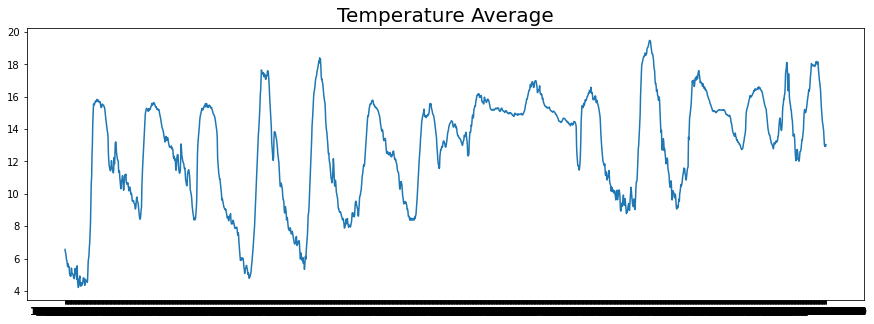

In [5]:
dates = df['DateTime'].values
temp = df['Temperature'].values

plt.figure(figsize=(15,5))
plt.plot(dates[:2000], temp[:2000])
plt.title('Temperature Average',
          fontsize=20)

**Preprocessing**

In [7]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [8]:
train_x, val_x, train_y, val_y = train_test_split(dates, temp, test_size=0.2, shuffle=False)

train_set = windowed_dataset(train_y, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(val_y, window_size=60, batch_size=100, shuffle_buffer=1000)

**Arsitektur Model**

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

**Callbacks**

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min',
                               verbose=1, patience=3)

callbacks = [early_stopping]

**Model Compilling and Fitting**

In [11]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])
history = model.fit(train_set, epochs=100, validation_data=val_set, callbacks=callbacks)

Epoch 1/100
419/419 [==============================] - 20s 27ms/step - loss: 13.9527 - mae: 14.4481 - val_loss: 4.0369 - val_mae: 4.5067
Epoch 2/100
419/419 [==============================] - 10s 23ms/step - loss: 1.5519 - mae: 1.9871 - val_loss: 0.9313 - val_mae: 1.3251
Epoch 3/100
419/419 [==============================] - 10s 23ms/step - loss: 0.4914 - mae: 0.8379 - val_loss: 0.5693 - val_mae: 0.9733
Epoch 4/100
419/419 [==============================] - 11s 25ms/step - loss: 0.2232 - mae: 0.5118 - val_loss: 0.2905 - val_mae: 0.6125
Epoch 5/100
419/419 [==============================] - 10s 23ms/step - loss: 0.1248 - mae: 0.3641 - val_loss: 0.1457 - val_mae: 0.3992
Epoch 6/100
419/419 [==============================] - 11s 27ms/step - loss: 0.1002 - mae: 0.3241 - val_loss: 0.1339 - val_mae: 0.3966
Epoch 7/100
419/419 [==============================] - 10s 23ms/step - loss: 0.0868 - mae: 0.2973 - val_loss: 0.1397 - val_mae: 0.4121
Epoch 8/100
419/419 [==============================] 

**Grafik Loss dan MAE**

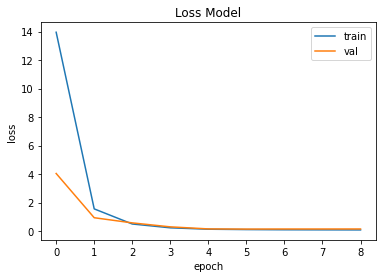

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

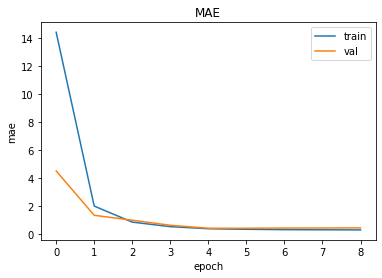

In [14]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()